In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack, csr_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
df = pd.read_csv('Airbnb_Data.csv')

print(df.head())
print(df.info())
print(df.describe())

         id  log_price property_type  ...  zipcode bedrooms  beds
0   6901257   5.010635     Apartment  ...    11201      1.0   1.0
1   6304928   5.129899     Apartment  ...    10019      3.0   3.0
2   7919400   4.976734     Apartment  ...    10027      1.0   3.0
3  13418779   6.620073         House  ...  94117.0      2.0   2.0
4   3808709   4.744932     Apartment  ...    20009      0.0   1.0

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  flo

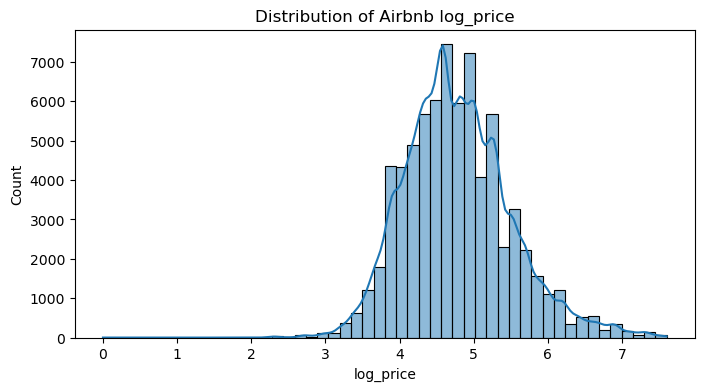

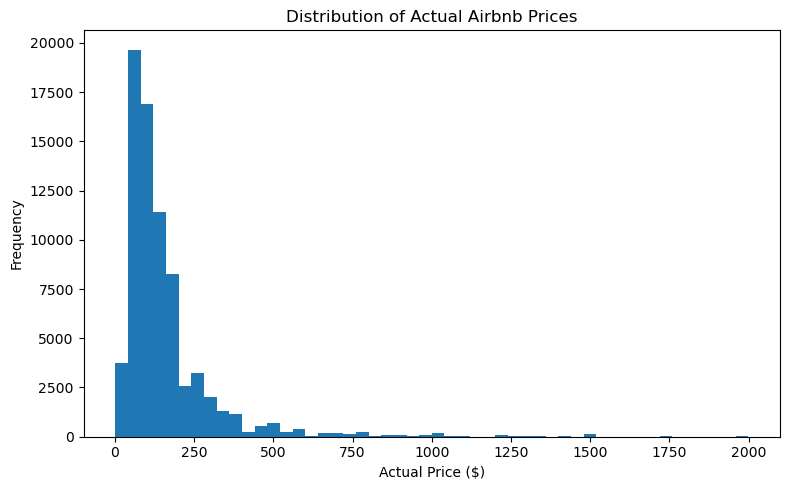

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(df['log_price'], bins=50, kde=True)
plt.title("Distribution of Airbnb log_price")
plt.show()

df['price'] = np.exp(df['log_price'])

# Plot histogram of actual prices
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=50)
plt.xlabel("Actual Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Actual Airbnb Prices")
plt.tight_layout()
plt.show()

In [22]:
numeric_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

X_numeric = df[numeric_cols]

# Handle categorical features
categorical_cols = ['property_type','room_type','cancellation_policy','bed_type','city']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(df[categorical_cols])

# Combine numeric and categorical features
X = hstack([csr_matrix(X_numeric.values), X_cat_encoded])
y = df['log_price'].values

# --- 6. Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# --- 7. Model 1: Random Forest Regressor ---
model_rf = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)




In [24]:
# --- 8. Model 2: Ridge Regression ---
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

In [25]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("R^2:", r2_score(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


--- Random Forest Regressor ---
R^2: 0.6049678988600923
RMSE: 0.4504866492029989
MAE: 0.33881649647679846


--- Ridge Regression ---
R^2: 0.5607439852141677
RMSE: 0.4750338839333915
MAE: 0.3591669943993864




c:\Users\monic\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\monic\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


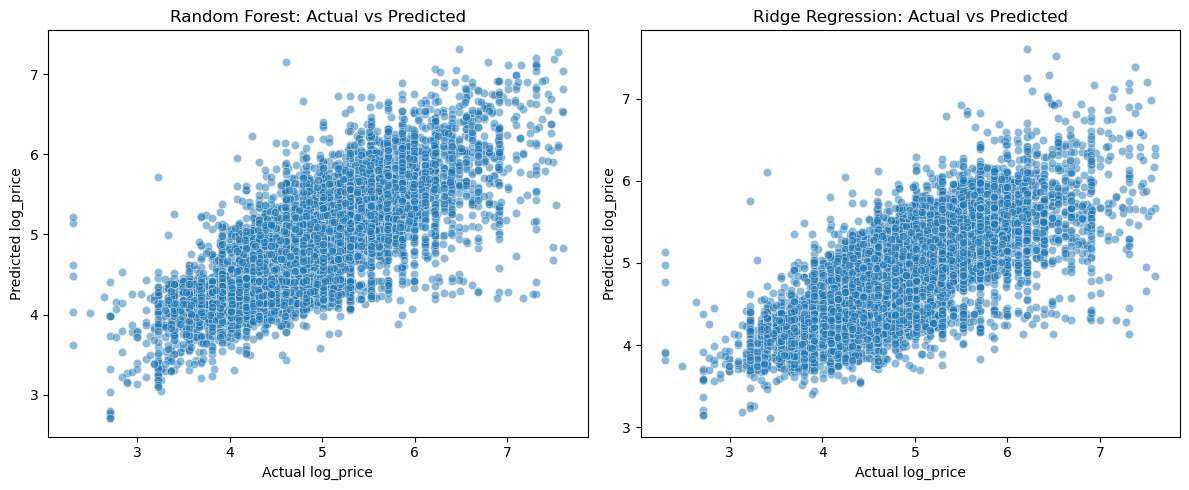

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_pred_ridge, alpha=0.5)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual log_price")
plt.ylabel("Predicted log_price")

plt.tight_layout()
plt.show()

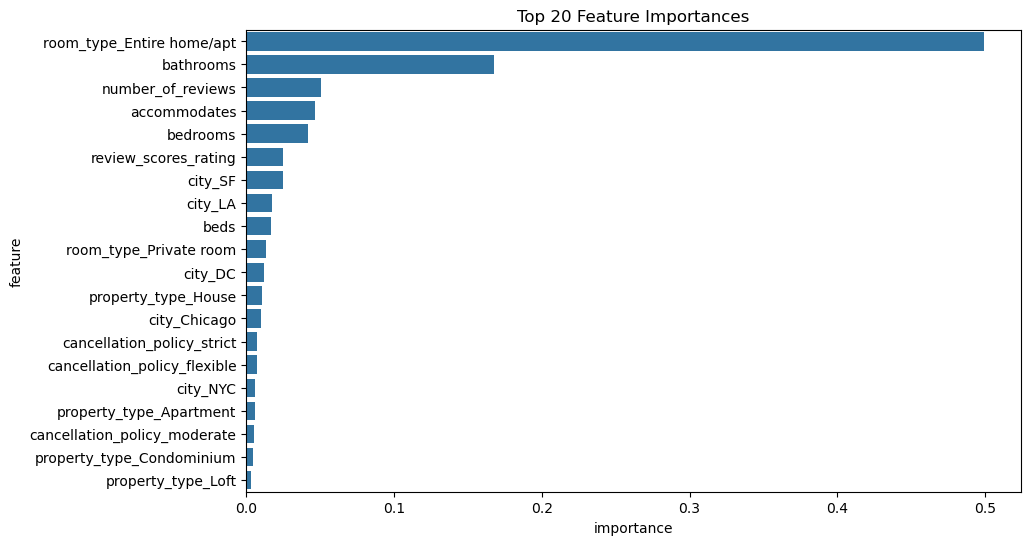

In [30]:
feature_names = numeric_cols + list(encoder.get_feature_names_out(categorical_cols))
importances = model_rf.feature_importances_

feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feat_imp_df)
plt.title("Top 20 Feature Importances")
plt.show()